In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import cv2
import time

def filterCal(i1, j1, userfilter, imageUser) :
    sum1 = 0
    r , c = userfilter.shape
    for i in range (0 , r):
        for j in range(0 , c):
            sum1 += userfilter[i][j]*imageUser[i1 + i][j1+j]
            
    if sum1 > 255 :
        sum1 = 255
    elif sum1 < 0 :
        sum1 = 0
        
    return sum1
        

def hist_plot(image):
      
    x = np.array(range(0,256))
    y = np.zeros(256);
    
    m,n = image.shape
       
    for i in range(m):
        for j in range(n):
            if(math.ceil(image[i][j]) > 255):
                val = 255
            elif(math.ceil(image[i][j]) < 0):
                val = 0
            else:
                val =   math.ceil(image[i][j])
            y[  val]+= 1
          
    return (x, y)

Image Matrix
(100, 100)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


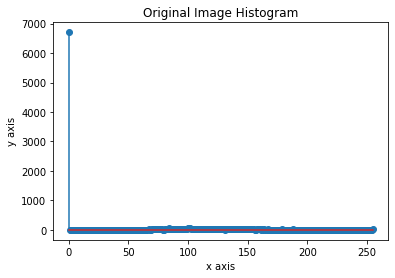

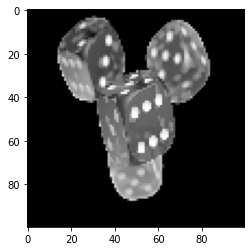

Input Filter from User ( rows and columns should be same as of now)
Enter the rows for filter  :3
Enter the cols for filter :3
Enter the values for filter :1 -1 1 0 0 0 1 -1 1
User Filter
[[ 1 -1  1]
 [ 0  0  0]
 [ 1 -1  1]]
Filter Rotated by 180 [[ 1 -1  1]
 [ 0  0  0]
 [ 1 -1  1]]
Enter the values for stride (should be greater than 0) :1
Enter in  0 or 1 whether padding required or not  :1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


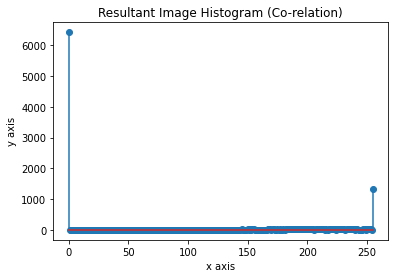

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


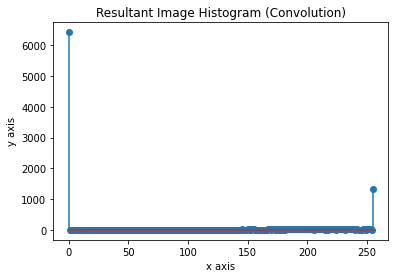

In [ ]:
imageUser = cv2.imread('/content/dice.png', 0)
#imageUser = np.random.randint(0,255,(100,100),dtype='int64')
imageUser = cv2.resize(imageUser, (100,100))
imageRows , imageCols = imageUser.shape
print("Image Matrix")
print(imageUser.shape)
print(imageUser)
r1, count1 = hist_plot(imageUser)
  
plt.stem(r1, count1)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Original Image Histogram')
plt.show()
plt.imshow(imageUser, cmap="gray")
plt.show()

print("Input Filter from User ( rows and columns should be same as of now)")
filterRows = int(input("Enter the rows for filter  :"))
filterCol = int(input("Enter the cols for filter :"))

numbers = input("Enter the values for filter :")
userFilter = np.array(list(map(int, numbers.split()))).reshape(filterRows, filterCol)
print("User Filter")
print(userFilter)

userFilterConv = np.rot90(userFilter, 2) 
print("Filter Rotated by 180", userFilterConv)

stride = int(input("Enter the values for stride (should be greater than 0) :")  )  

padding = int(input("Enter in  0 or 1 whether padding required or not  :"))

imageRrows = math.ceil(((imageRows - filterRows + 2*padding)/stride) + 1)
imageRcols = math.ceil(((imageCols - filterCol + 2*padding)/stride) + 1)
imageResultant = np.zeros([imageRrows, imageRcols ])
imageResultantConv = np.zeros([imageRrows, imageRcols ])

if(padding):
  imageRrows = imageRows;
  imageRcols = imageCols;
  imageResultant = np.zeros([imageRrows, imageRcols ])
  imageResultantConv = np.zeros([imageRrows, imageRcols ])
  pad_x = math.ceil(((( imageRrows - 1)*stride  +  filterRows)  -  imageRows)/2 )   
  pad_y = math.ceil(((( imageRcols - 1)*stride  +  filterCol)  -  imageCols)/2 )                                                                                                                                                                                                                           
  imageUser  = np.pad(imageUser, pad_width=[(pad_x, ), (pad_y, )], mode='constant',
               constant_values=0)
  imageRows, imageCols = imageUser.shape
  #print("Image shape after padding " , imageUser.shape)
    
  
x=0
for i in range( 0 , imageRows - filterRows + 1, stride) :
    y = 0
    if(i + filterRows > imageRows  ):
        break;
    for j in range(0 , imageCols - filterCol + 1, stride):
        if(j + filterCol > imageCols  ):
            break;
        imageResultant[x][y] = filterCal(i,j,userFilter,imageUser)
        imageResultantConv[x][y] = filterCal(i,j,userFilterConv,imageUser)
        y=y+1
        if(y >= imageRcols ):
            break;
    x = x+1
    if(x >= imageRrows ):
        break;

r1, count1 = hist_plot(imageResultant)  
plt.stem(r1, count1)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Resultant Image Histogram (Co-relation)')
plt.show()
##plt.imshow(imageResultant, cmap="gray")
#plt.show()

r2, count2 = hist_plot(imageResultantConv)
plt.stem(r2, count2)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Resultant Image Histogram (Convolution)')
plt.show()
#plt.imshow(imageResultantConv, cmap="gray")
#plt.show()